In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [0]:
n_input =  784
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128
n_output = 10

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/mo

In [6]:
!ls

data  sample_data


In [7]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("MNIST Datasize: training sample: {0}, Testing samples: {1}, Valdiation samples{2}",num_training, num_testing, num_validation)

MNIST Datasize: training sample: {0}, Testing samples: {1}, Valdiation samples{2} 55000 10000 5000


In [0]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [0]:
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

In [10]:
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev=0.1)),
              "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev=0.1)),
              "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev=0.1)),
              "Wout": tf.Variable(tf.truncated_normal([n_hidden_3, n_output], stddev=0.1))
            }
nn_bias = { "B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
            "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
            "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
            "B4": tf.Variable(tf.truncated_normal([n_output]))
          }

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]), nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]), nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]), nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)
prediction_out =  tf.equal(tf.argmax(output_layer,1),tf.argmax(Y,1))
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [13]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):
    mini_batch_x, mini_batch_y =  mnist_data.train.next_batch(batch_size)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)
    sess.run(optimizer, feed_dict={X:mini_batch_x, Y:mini_batch_y, keep_prob:1})
    if i%100 ==0:
      mini_batch_loss, mini_batch_accuracy =  sess.run([computed_loss, nn_accuracy], feed_dict = {X:mini_batch_x, Y: mini_batch_y, keep_prob:1})
      mini_batch_val_loss, mini_batch_val_accuracy =  sess.run([computed_loss, nn_accuracy], feed_dict = {X:mini_batch_val_x, Y: mini_batch_val_y, keep_prob:1})
      print("Iterations : {0}, Train_loss = {1}, Train_accuracy:{2}, val_loss:{3}, val_accuracy{4}".format(i,mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))
      
  print("Optimiztion Finished")
  test_accuracy =  sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prob:1})
  print("testing accuracy is {0}".format(test_accuracy))
  
  saver_path = saver.save(sess,"./model/my_model.ckpt")

Iterations : 0, Train_loss = 4.858034133911133, Train_accuracy:0.1953125, val_loss:5.318384170532227, val_accuracy0.09375
Iterations : 100, Train_loss = 3.1485776901245117, Train_accuracy:0.125, val_loss:3.0139718055725098, val_accuracy0.1640625
Iterations : 200, Train_loss = 2.6732873916625977, Train_accuracy:0.203125, val_loss:3.0964150428771973, val_accuracy0.1484375
Iterations : 300, Train_loss = 2.292391538619995, Train_accuracy:0.25, val_loss:2.7782974243164062, val_accuracy0.15625
Iterations : 400, Train_loss = 2.3696913719177246, Train_accuracy:0.234375, val_loss:2.3481383323669434, val_accuracy0.234375
Iterations : 500, Train_loss = 2.217371702194214, Train_accuracy:0.3046875, val_loss:2.002077102661133, val_accuracy0.390625
Iterations : 600, Train_loss = 1.626173973083496, Train_accuracy:0.46875, val_loss:1.960902214050293, val_accuracy0.328125
Iterations : 700, Train_loss = 1.6590334177017212, Train_accuracy:0.4375, val_loss:1.821624755859375, val_accuracy0.4375
Iterations :

In [14]:
!ls

data  model  sample_data


In [16]:
!pwd

/content


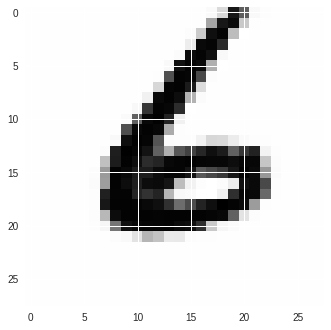

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt
Prediction for test image is [4]


In [23]:
img = cv2.imread("6.jpeg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap='gray')
plt.show()
rescaled_image.shape

dum = rescaled_image.reshape(1,-1)/255
dum.shape

with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z =  output_layer.eval(feed_dict={X:dum, keep_prob:1.0})
  y_pred = np.argmax(Z, axis=1)
  print("Prediction for test image is {0}".format(y_pred))